In [1]:
import cv2 as cv
import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = keras.models.load_model('asl_model_2.h5')

In [3]:
def predict_letter(n):
    if n <= 25:
        return 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'[n]
    elif n == 26:
        return 'del'
    elif n == 27:
        return 'nothing'
    else:
        return 'space'

In [4]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 60, 60, 48)        3648      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 30, 30, 48)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 32)        13856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 4, 4, 32)        

In [6]:
cap = cv.VideoCapture(0)

window = (0,0,250,250)

while True:
    _, frame = cap.read()
    roi = frame[0:250, 0:250]
    roi = cv.cvtColor(roi, cv.COLOR_BGR2RGB)

    roi_small = cv.resize(roi, (64, 64))
    roi_small = np.expand_dims(roi_small, axis=0)

    n = model.predict(roi_small).argmax()
    letter = predict_letter(n)

    cv.putText(roi, letter, (0, 250), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # cv.imshow('frame', frame)
    cv.imshow('roi', roi)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

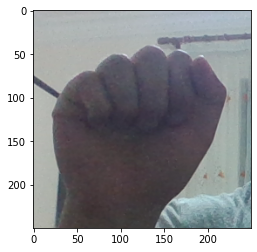

In [26]:
plt.imshow(roi)

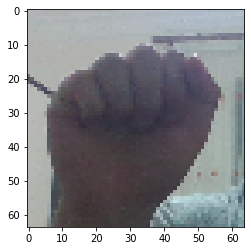

In [29]:
model.predict(roi_small).argmax()

20

In [36]:
cap.release()